In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
# needed imports
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [5]:
'''
First define a function to read in fasta file.
1. adding line = line.rstrip(), which will remove \n at the end of each line
2. save results as a generator object, with name (strains) and seq (genomes), easier to store and reference

'''
import pandas as pd
import numpy as np

def read_fasta(fp):
        name, seq = None, []
        for line in fp:
            line = line.rstrip()
            if line.startswith(">"):
                if name: yield (name, ''.join(seq))
                name, seq = line, []
            else:
                seq.append(line)
        if name: yield (name, ''.join(seq))

            

In [6]:
#adding strain data to one array and genomic data to the other
strains = []
genomes = []

with open(r'C:/Users/srava/BedfordProjects/zika/results/aligned.fasta') as fp:
    for name, seq in read_fasta(fp):
            strains.append(name)
            genomes.append(seq)

In [7]:
# Return the Hamming distance between string1 and string2.
# string1 and string2 should be the same length.
def hamming_distance(array1, array2): 
    # Start with a distance of zero, and count up
    distance = 0
    # Loop over the indices of the string
    L = len(array1)
    for i in range(L):
        # Add 1 to the distance if these two characters are not equal
        if array1[i] != array2[i] and array1[i] != 'N' and array2[i] != 'N':
            distance += 1
    # Return the final count of differences
    return distance

In [9]:
#Using the Hamming distance to create a similarity matrix
numbers = []
matrixOfNum = []
for i in range(0,len(genomes)):
    for j in range(0,len(genomes)):
        num = hamming_distance(genomes[i],genomes[j])
        numbers.append(num)
    matrixOfNum.append(numbers)
    numbers = []
dataa = pd.DataFrame(matrixOfNum, columns = ["strain " + str(i) for i in range(1,len(matrixOfNum) + 1)], dtype="float")
print(dataa)

     strain 1  strain 2  strain 3  strain 4  strain 5  strain 6  strain 7  \
0         0.0      12.0      15.0      14.0      19.0      13.0      12.0   
1        12.0       0.0      15.0      14.0      18.0      13.0      11.0   
2        15.0      15.0       0.0      17.0      21.0      16.0      14.0   
3        14.0      14.0      17.0       0.0       8.0      15.0      13.0   
4        19.0      18.0      21.0       8.0       0.0      20.0      19.0   
5        13.0      13.0      16.0      15.0      20.0       0.0      13.0   
6        12.0      11.0      14.0      13.0      19.0      13.0       0.0   
7        13.0      12.0      15.0      12.0      18.0      14.0      13.0   
8        13.0      12.0      15.0      14.0      20.0      14.0      13.0   
9        18.0      19.0      22.0      21.0      27.0      21.0      19.0   
10       18.0      19.0      22.0      21.0      27.0      21.0      19.0   
11       15.0      15.0      16.0      16.0      20.0      16.0      14.0   

AxesSubplot(0.125,0.125;0.62x0.755)


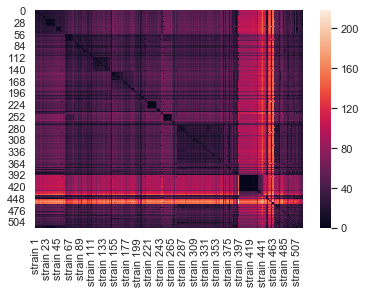

In [12]:
import seaborn as sns
print(sns.heatmap(dataa))


In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(dataa)
y_kmeans = kmeans.predict(dataa)
print(y_kmeans)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 4 4 4 4 4 6 4 4 4 4 4 4 4 0 4
 0 6 6 6 6 6 6 6 0 4 4 4 6 4 4 6 4 6 0 6 6 6 6 6 6 6 6 4 4 4 4 4 6 6 6 4 4
 6 6 6 6 6 6 6 4 4 0 0 6 6 6 0 6 6 6 6 6 6 0 0 0 4 6 0 6 0 0 0 0 0 6 6 0 6
 4 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 4 0 6 6 6 6 0 6 6 6 6 6 6 6 4
 0 0 0 0 0 0 0 0 4 6 4 6 0 6 0 4 4 0 6 4 0 4 6 6 6 6 4 6 4 6 6 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 6 6 0 0 0 0 0 0 4 0 4 3 3 3 4 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 6 6 6 4 4 0 4 0 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 4 6 6 6 6 6 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 4 6 0 6 4 6 4 6 6 0 6 4 6 0 0 4
 0 0 0 6 6 6 4 6 6 4 6 4 3 0 4 0 4 0 3 3 4 6 4 4 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 5 5 1 1 4
 1 4 1 1 3 4 4 6 5 5 5 5 5 5 4 1 5 5 5 5 6 6 6 6 6 6 6 6 4 4 6 0 4 0 4 0 6
 3 4 6 4 6 0 3 4 4 6 4 6 

In [14]:
principalDf = pd.DataFrame(y_kmeans,columns = ['kmeans'])
print(principalDf)

     kmeans
0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
..      ...
489       4
490       6
491       4
492       6
493       3
494       3
495       6
496       6
497       6
498       4
499       3
500       4
501       4
502       4
503       4
504       6
505       4
506       3
507       4
508       3
509       6
510       6
511       4
512       4
513       4
514       4
515       4
516       4
517       4
518       4

[519 rows x 1 columns]


In [36]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t',encoding='utf-8')
country_df = metadata_df[['country','strain']]
 
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']


colors_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\config\colors.tsv', delimiter='\t',encoding='utf-8')
colors_df.columns = ['y','country', 'color']
colors_df1 = colors_df[['country','color']]

result = pd.merge(metadata_df,
                 colors_df1[['country', 'color']],
                 on='country')
result_df_region = result[['strain','region']]
result_df = result[['region', 'strain','country','color']]

finalDf = pd.concat([principalDf, result_df[['region','country','strain']]], axis = 1)
finalDf.columns = ['cluster 1','region', 'country', 'strain']

In [37]:
finalDf

,cluster 1,region,country,strain
0,3.0,oceania,french_polynesia,1_0015_PF
1,3.0,oceania,french_polynesia,1_0016_PF
2,3.0,oceania,french_polynesia,1_0030_PF
3,3.0,oceania,french_polynesia,1_0035_PF
4,3.0,oceania,french_polynesia,1_0038_PF
5,3.0,oceania,french_polynesia,1_0049_PF
6,3.0,oceania,french_polynesia,1_0080_PF
7,3.0,oceania,french_polynesia,1_0087_PF
8,3.0,oceania,french_polynesia,1_0111_PF
9,3.0,oceania,french_polynesia,1_0117_PF


In [38]:
numm = []
for x in range(0, len(y_kmeans)):
    numm.append(y_kmeans[x] + .2)
numm = pd.DataFrame(numm)
numm.columns = ['xValue']
finalDf = pd.concat([finalDf, numm], axis = 1)
numm = []

In [39]:
finalDf

,cluster 1,region,country,strain,xValue
0,3.0,oceania,french_polynesia,1_0015_PF,3.2
1,3.0,oceania,french_polynesia,1_0016_PF,3.2
2,3.0,oceania,french_polynesia,1_0030_PF,3.2
3,3.0,oceania,french_polynesia,1_0035_PF,3.2
4,3.0,oceania,french_polynesia,1_0038_PF,3.2
5,3.0,oceania,french_polynesia,1_0049_PF,3.2
6,3.0,oceania,french_polynesia,1_0080_PF,3.2
7,3.0,oceania,french_polynesia,1_0087_PF,3.2
8,3.0,oceania,french_polynesia,1_0111_PF,3.2
9,3.0,oceania,french_polynesia,1_0117_PF,3.2


In [2]:
import altair as alt

alt.Chart(finalDf).mark_circle(size=60).encode(
    x='xValue',
    y='cluster 1',
    opacity=alt.value(0.5),
    color='cluster 1',
    tooltip=['strain', 'region']
).interactive()
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

NameError: name 'finalDf' is not defined

In [45]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES


In [52]:
kmedoids_instance = kmedoids(dataa, [1,7], data_type='distance_matrix')
# run cluster analysis and obtain results
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

KeyError: 0

[]


In [3]:
import numpy as np
import random

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return M, C
